# Prova 3
### Aluno: Pedro Faria Albuquerque
### Número de matrícula: 2022039658


#### warning
Qiskit uses little-endian notation, which is different from the notation used by Nielsen and Chuang and the class notes. This means that the ordering of the qubits is different:


Little-endian (qiskit): $|q_1q_0\rangle$
Big-endian (Nielsen): $|q_0q_1\rangle$

### Disclaimer: Use of gemini

I used gemini to document the codes and to prepare the test cases.

In the oracle section gemini helped me with what python functions I should use to trace out the auxiliary qubits.


The algorithms and functions which solve the exercise did not involve the use of LLMs.

### Importing global functions and defining global variables

In [1]:
from qiskit.visualization import plot_bloch_vector
import numpy as np
from qiskit.quantum_info import state_fidelity, partial_trace, Statevector
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.visualization import plot_histogram
import time

from scipy.linalg import eigh

simulator_basic = BasicSimulator()
simulator_aer = AerSimulator()

### Exercise 1:

In [2]:
def ex_1(gate):
    """
    Constructs and simulates a single-qubit quantum circuit with conditional gates.

    This function defines a quantum circuit that starts with an X-gate applied
    to a single qubit. Depending on the `gate` parameter, it then conditionally
    applies a Hadamard (H) or Pauli-X (X) gate at specific points, always
    sandwiching a Pauli-Z (Z) gate. The circuit's final statevector is saved,
    and then a measurement is performed. The function returns the measurement
    counts from a single shot simulation using `simulator_aer`.

    The sequence of operations is as follows:
    1. Apply an X-gate. Starts the qubit at |1>
    2. If `gate` is 'h', apply an H-gate.
    3. Apply a Z-gate.
    4. If `gate` is 'h', apply an H-gate.
    5. If `gate` is 'x', apply an X-gate.
    6. Apply a Z-gate.
    7. If `gate` is 'x', apply an X-gate.
    8. Save the statevector.
    9. Measure the qubit.

    Args:
        gate (str): A string specifying the conditional gate to apply.
                    Accepted values are 'h' for Hadamard gates or 'x' for Pauli-X gates.
                    If any other value is provided, no additional conditional gates are applied.

    Returns:
        dict: A dictionary representing the measurement counts from the
              quantum circuit simulation. The keys are the measurement outcomes
              (e.g., '0' or '1'), and the values are their frequencies (which
              will be 1 for the observed outcome since shots=1).

    """
    
    
    ### Define the circuit:
    qc = QuantumCircuit(1)
    qc.x(0)
    
    
    if gate == 'h':
        qc.h(0)
    qc.z(0)
    if gate == 'h':
        qc.h(0)
    if gate == 'x':
        qc.x(0)
    qc.z(0)
    if gate == 'x':
        qc.x(0)
    
    qc.save_statevector(label = 'state')
    qc.measure_all()
    
    res = simulator_aer.run(qc, shots = 1).result()

    statevector = res.data()['state']
    
    return res.get_counts()

In [3]:

# Test with 'h' gate
start_time_h = time.perf_counter()
counts_h = ex_1('h')
end_time_h = time.perf_counter()
time_elapsed_h = end_time_h - start_time_h
print(f"Time taken for ex_1('h'): {time_elapsed_h:.6f} seconds")
print(f"Counts for 'h': {counts_h}")
print("-" * 30)

# Test with 'x' gate
start_time_x = time.perf_counter()
counts_x = ex_1('x')
end_time_x = time.perf_counter()
time_elapsed_x = end_time_x - start_time_x
print(f"Time taken for ex_1('x'): {time_elapsed_x:.6f} seconds")
print(f"Counts for 'x': {counts_x}")
print("-" * 30)

### Average time for 100 runs: 
num_runs = 100
total_time_h = 0
for _ in range(num_runs):
    start_time = time.perf_counter()
    ex_1('h')
    end_time = time.perf_counter()
    total_time_h += (end_time - start_time)

average_time_h = total_time_h / num_runs
print(f"Average time over {num_runs} runs for ex_1('h'): {average_time_h:.6f} seconds")


total_time_x = 0
for _ in range(num_runs):
    start_time = time.perf_counter()
    ex_1('x')
    end_time = time.perf_counter()
    total_time_x += (end_time - start_time)

average_time_x = total_time_x / num_runs
print(f"Average time over {num_runs} runs for ex_1('x'): {average_time_x:.6f} seconds")



Time taken for ex_1('h'): 0.113718 seconds
Counts for 'h': {'0': 1}
------------------------------
Time taken for ex_1('x'): 0.002653 seconds
Counts for 'x': {'1': 1}
------------------------------
Average time over 100 runs for ex_1('h'): 0.001679 seconds
Average time over 100 runs for ex_1('x'): 0.002033 seconds


The circuit can be visualized belowed:

We use the fact that $X = HZH$.

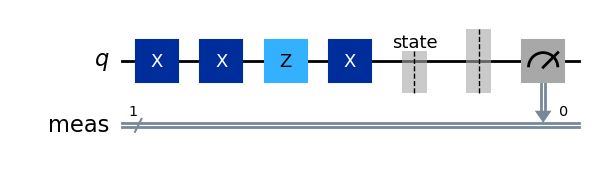

<IPython.core.display.Latex object>

{'1': 500}

In [4]:
### For X:

qc = QuantumCircuit(1)

qc.x(0)


qc.x(0)
qc.z(0)
qc.x(0)


qc.save_statevector(label = 'state')
qc.measure_all()


display(qc.draw('mpl'))

res = simulator_aer.run(qc, shots = 500).result()

display(res.data()['state'].draw(output = 'latex'))
display(res.get_counts())

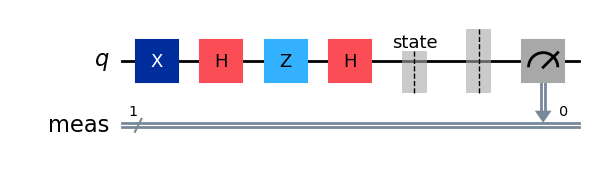

<IPython.core.display.Latex object>

{'0': 500}

In [5]:
### For H:

qc = QuantumCircuit(1)

qc.x(0)


qc.h(0)
qc.z(0)
qc.h(0)


qc.save_statevector(label = 'state')
qc.measure_all()


display(qc.draw('mpl'))

res = simulator_aer.run(qc, shots = 500).result()

display(res.data()['state'].draw(output = 'latex'))
display(res.get_counts())

### Exercise 2.

### Answer:

We will use the superdense coding protocol to answer this question. The protocol sends two bits using only one qubit and the two bits are sent depending on the choice of gates used by Alice - applied to the first qubit. The ideia here will be the same, except you pass the gate, instead of the two bits you would like to send.

In [6]:
def ex_2(gate):
    """
    Constructs, simulates, and analyzes a quantum circuit to figure our what unitary was passed.

    The circuit prepares a Bell state (|Phi+>), applies a single-qubit gate
    (Identity, Pauli-X, Pauli-Z, or Pauli-Y) to one qubit, and then measures
    both qubits in the Bell basis. The measurement outcome (a binary string
    like '00', '01', '10', '11') is converted to an integer (0, 1, 2, or 3).
    A specific mapping is applied to swap outcomes 2 and 3 for the final return value.

    The circuit operations are:
    1.  Initialize a 2-qubit quantum circuit.
    2.  Create a Bell state |Phi+> (1/sqrt(2) * (|00> + |11>)) by applying H to qubit 1
        and CNOT from qubit 1 to qubit 0.
    3.  Apply a barrier.
    4.  Conditionally apply a single-qubit gate to qubit 0 based on the `gate` parameter:
        -   'I': Identity gate (qc.id(0))
        -   'X': Pauli-X gate (qc.x(0))
        -   'Z': Pauli-Z gate (qc.z(0))
        -   'Y': Pauli-Y gate (qc.x(0); qc.z(0) - equivalent to Y up to a global phase)
    5.  Apply another barrier.
    6.  Measure in the Bell basis:
        -   CNOT from qubit 1 to qubit 0.
        -   Hadamard gate on qubit 1.
    7.  Measure all qubits.
    8.  Run the circuit on `simulator_aer` for 1 shot.
    9.  Extract the single measurement outcome (binary string).
    10. Convert the binary string outcome to an integer.
    11. Apply a final remapping: if the integer is 2, return 3; if 3, return 2;
        otherwise, return the integer as is.
    12. Measures and prints the execution time of the function.

    Args:
        gate (str): A single character string specifying the gate to apply to qubit 0.
                    Supported values: 'I' (Identity), 'X' (Pauli-X), 'Z' (Pauli-Z),
                    'Y' (Pauli-Y). Case-sensitive.

    Returns:
        int: An integer representing the mapped measurement outcome (0, 1, 2, or 3).
             This value corresponds to the final state measured in the Bell basis,
             after a specific remapping of outcomes 2 and 3.
    """
    qc = QuantumCircuit(2)
    
    ### creates bell state |Phi_+>:
    qc.h(1)
    
    qc.cx(1,0)
    
    qc.barrier()
    
    ### applies task
    if gate == 'I':
        qc.id(0)
        
    elif gate == 'X':
        qc.x(0)
    elif gate =='Z':
        qc.z(0)
    elif gate == 'Y':
        qc.x(0); qc.z(0)    
        
    qc.barrier()
    
    ### measuring in the bell basis:
    
    qc.cx(1,0)
    qc.h(1)
    qc.measure_all()
    
    res = simulator_aer.run(qc, shots = 1).result()
    count = res.get_counts()
    
    ### Returning 0,1,2,3 instead of binary:
    
    ### This is just a matter of Alice and Bob determining what each bit represents:
    
    key = list(count.keys())[0]
    integer = int(key, 2)
    if integer == 2:
        ans = 3
    elif integer ==3:
        ans = 2
    else:
        ans = integer
    return ans
    
    
    
    
    

In [7]:

# --- Example Usage ---
print("--- Testing ex_2 function ---")

# Test with 'I' gate
result_I = ex_2('I')
print(f"Result for 'I' gate: {result_I}\n") # Expected: 0 

# Test with 'X' gate
result_X = ex_2('X')
print(f"Result for 'X' gate: {result_X}\n") # Expected: 1

# Test with 'Y' gate
result_Y = ex_2('Y')
print(f"Result for 'Y' gate: {result_Y}\n") # Expected: 2 

# Test with 'Z' gate
result_Z = ex_2('Z')
print(f"Result for 'Z' gate: {result_Z}\n") # Expected: 3 




--- Testing ex_2 function ---
Result for 'I' gate: 0

Result for 'X' gate: 1

Result for 'Y' gate: 2

Result for 'Z' gate: 3



In [8]:
print("--- Measuring execution time for ex_2() ---")

# Test with 'I' gate
start_time_I = time.perf_counter()
result_I = ex_2('I')
end_time_I = time.perf_counter()
time_elapsed_I = end_time_I - start_time_I
print(f"Time taken for ex_2('I'): {time_elapsed_I:.9f} seconds")
print(f"Result for 'I' gate: {result_I}")
print("-" * 30)

# Test with 'X' gate
start_time_X = time.perf_counter()
result_X = ex_2('X')
end_time_X = time.perf_counter()
time_elapsed_X = end_time_X - start_time_X
print(f"Time taken for ex_2('X'): {time_elapsed_X:.9f} seconds")
print(f"Result for 'X' gate: {result_X}")
print("-" * 30)

# Test with 'Y' gate
start_time_Y = time.perf_counter()
result_Y = ex_2('Y')
end_time_Y = time.perf_counter()
time_elapsed_Y = end_time_Y - start_time_Y
print(f"Time taken for ex_2('Y'): {time_elapsed_Y:.9f} seconds")
print(f"Result for 'Y' gate: {result_Y}")
print("-" * 30)

# Test with 'Z' gate
start_time_Z = time.perf_counter()
result_Z = ex_2('Z')
end_time_Z = time.perf_counter()
time_elapsed_Z = end_time_Z - start_time_Z
print(f"Time taken for ex_2('Z'): {time_elapsed_Z:.9f} seconds")
print(f"Result for 'Z' gate: {result_Z}")
print("-" * 30)


num_runs = 100
total_time_all_gates = 0
gates_to_test = ['I', 'X', 'Z', 'Y']

print(f"\n--- Average time over {num_runs} runs for each gate type ---")
for gate_type in gates_to_test:
    total_time_for_gate = 0
    for _ in range(num_runs):
        start_time_run = time.perf_counter()
        ex_2(gate_type)
        end_time_run = time.perf_counter()
        total_time_for_gate += (end_time_run - start_time_run)
    average_time_for_gate = total_time_for_gate / num_runs
    print(f"Average time for ex_2('{gate_type}') over {num_runs} runs: {average_time_for_gate:.9f} seconds")

--- Measuring execution time for ex_2() ---
Time taken for ex_2('I'): 0.004427077 seconds
Result for 'I' gate: 0
------------------------------
Time taken for ex_2('X'): 0.007515890 seconds
Result for 'X' gate: 1
------------------------------
Time taken for ex_2('Y'): 0.005896780 seconds
Result for 'Y' gate: 2
------------------------------
Time taken for ex_2('Z'): 0.005282788 seconds
Result for 'Z' gate: 3
------------------------------

--- Average time over 100 runs for each gate type ---
Average time for ex_2('I') over 100 runs: 0.003142809 seconds
Average time for ex_2('X') over 100 runs: 0.003121908 seconds
Average time for ex_2('Z') over 100 runs: 0.002138464 seconds
Average time for ex_2('Y') over 100 runs: 0.002218200 seconds


### Exercise 3

In [235]:
def prepare_psi0() -> QuantumCircuit:
    """
    Prepares a 3-qubit quantum circuit in a specific initial state,
    which is intended to be one of a set of orthonormal states (psi0).

    The circuit operations are:
    1.  Initializes a 3-qubit quantum circuit (all qubits in |0>).
    2.  Applies an Ry rotation to qubit 0 with an angle calculated from arccos(1/sqrt(3)).
        This prepares qubit 0 in a superposition state.
    3.  Applies an Ry rotation to qubit 1 with an angle of 2*arccos(0) = pi.
        This effectively flips qubit 1 to |1> if it starts at |0>.
    4.  Defines a Controlled-Hadamard (CH) gate with 1 control qubit.
    5.  Appends the CH gate to the circuit, with qubit 0 as control and qubit 2 as target.
    6.  Applies a CNOT gate with qubit 2 as control and qubit 0 as target.
    7.  Applies a CNOT gate with qubit 2 as control and qubit 1 as target.
    8.  Applies a CNOT gate with qubit 0 as control and qubit 1 as target.
    9.  Applies a Phase gate (P-gate) with an angle of 2*pi/3 to qubit 1.
    10. Applies a Phase gate (P-gate) with an angle of 4*pi/3 to qubit 2.

    Returns:
        QuantumCircuit: A 3-qubit quantum circuit prepared in the 'psi0' state.
    """
    qc = QuantumCircuit(3)

    qc.ry(2*np.arccos(1/np.sqrt(3)),0)
    qc.ry(2*np.arccos(0),1)
    
    ch = HGate().control(1)
    qc.append(ch, [0,2])
    qc.cx(2,0)
    qc.cx(2,1)
    qc.cx(0,1)

    qc.p(2*np.pi/3, 1)
    qc.p(4*np.pi/3,2)
    return qc

def prepare_psi1() -> QuantumCircuit:
    """
    Prepares a 3-qubit quantum circuit in a specific initial state,
    which is intended to be another of a set of orthonormal states (psi1),
    distinct from psi0 by a relative phase.

    The circuit operations are identical to `prepare_psi0` up to the final
    phase gates. The differences lie in the angles of the final phase gates:
    1.  Initializes a 3-qubit quantum circuit (all qubits in |0>).
    2.  Applies an Ry rotation to qubit 0 with an angle calculated from arccos(1/sqrt(3)).
    3.  Applies an Ry rotation to qubit 1 with an angle of 2*arccos(0) = pi.
    4.  Defines a Controlled-Hadamard (CH) gate with 1 control qubit.
    5.  Appends the CH gate to the circuit, with qubit 0 as control and qubit 2 as target.
    6.  Applies a CNOT gate with qubit 2 as control and qubit 0 as target.
    7.  Applies a CNOT gate with qubit 2 as control and qubit 1 as target.
    8.  Applies a CNOT gate with qubit 0 as control and qubit 1 as target.
    9.  Applies a Phase gate (P-gate) with an angle of 4*pi/3 to qubit 1.
    10. Applies a Phase gate (P-gate) with an angle of 2*pi/3 to qubit 2.

    Returns:
        QuantumCircuit: A 3-qubit quantum circuit prepared in the 'psi1' state.
    """
    qc = QuantumCircuit(3)

    qc.ry(2*np.arccos(1/np.sqrt(3)),0)
    qc.ry(2*np.arccos(0),1)
    
    ch = HGate().control(1)
    qc.append(ch, [0,2])
    qc.cx(2,0)
    qc.cx(2,1)
    qc.cx(0,1)

    qc.p(4*np.pi/3, 1)
    qc.p(2*np.pi/3,2)
    return qc 

def inverse_U() -> QuantumCircuit:
    """
    Generates the inverse of the quantum circuit prepared by `prepare_psi0()`.

    This inverse circuit acts as a unitary transformation U_inv such that if
    `prepare_psi0()` creates a state |psi0>, then U_inv |psi0> should ideally
    return the initial state |000>.

    Returns:
        QuantumCircuit: The inverse of the circuit generated by `prepare_psi0()`.
    """
    qc = prepare_psi0()
    return qc.inverse()
    

def ex_3(circ: QuantumCircuit) -> str:
    """
    Applies a unitary transformation (the inverse of `prepare_psi0`) to an
    input quantum circuit, measures all qubits, and returns a string
    indicating the measurement outcome.

    This function is designed to distinguish between input states that, when
    transformed by `inverse_U()`, ideally map to '000' or other distinct
    computational basis states.

    The process involves:
    1.  Taking the input `circ` (which is assumed to contain an initial state).
    2.  Obtaining the inverse unitary `U` from `inverse_U()`.
    3.  Appending `U` to `circ`, applying it to all 3 qubits.
    4.  Measuring all 3 qubits.
    5.  Transpiling the combined circuit for `simulator_aer`.
    6.  Running the transpiled circuit on `simulator_aer` for 1 shot.
    7.  Extracting the single measurement outcome (e.g., '000', '001').
    8.  Returning '0' if the outcome is '000', otherwise returning '1'.
        This implies a binary decision based on whether the state was mapped
        to '000' or something else.

    Args:
        circ (QuantumCircuit): The input quantum circuit, expected to be a
                               3-qubit circuit containing the state to be distinguished.

    Returns:
        str: '0' if the measurement outcome is '000', otherwise '1'.

    Note:
        This function relies on a globally accessible `simulator_aer` object,
        which is expected to be an instance of `qiskit_aer.Aerulator`.
        The interpretation of '0' or '1' as the return value depends on the
        specific properties of the states `prepare_psi0` and `prepare_psi1`
        and how `inverse_U` transforms them.
    """
    qc = circ
    U = inverse_U()
    qc.append(U,[0,1,2])
    
    qc.measure_all()
    
    qc_t = transpile(qc,simulator_aer)
    res = simulator_aer.run(qc_t, shots = 1).result()
    
    count = res.get_counts()
    
    value = list(count.keys())[0]
    
    if value == '000':
        return '0'
    else: 
        return '1'
    
# --- Test Cases for prepare_psi0 and prepare_psi1 with ex_3 ---
if __name__ == "__main__":
    print("--- Testing prepare_psi0 and prepare_psi1 with ex_3 ---")

    num_runs = 100 # Number of times to run ex_3 for robustness check

    # --- Test prepare_psi0 ---
    print("\nTesting prepare_psi0:")
    start_time_prep0 = time.perf_counter()
    psi0_circuit = prepare_psi0()
    end_time_prep0 = time.perf_counter()
    time_elapsed_prep0 = end_time_prep0 - start_time_prep0
    print(f"  Time taken to prepare_psi0: {time_elapsed_prep0:.9f} seconds")

    results_psi0 = []
    total_time_ex3_psi0 = 0
    for _ in range(num_runs):
        # Create a fresh circuit for ex_3 each time to avoid modifying the original psi0_circuit
        qc_for_ex3 = QuantumCircuit(3)
        # Append the prepared psi0_circuit to the fresh circuit
        qc_for_ex3.compose(psi0_circuit, [0,1,2], inplace=True)
        
        start_time_ex3_run = time.perf_counter()
        result = ex_3(qc_for_ex3)
        end_time_ex3_run = time.perf_counter()
        total_time_ex3_psi0 += (end_time_ex3_run - start_time_ex3_run)
        results_psi0.append(result)
    
    average_time_ex3_psi0 = total_time_ex3_psi0 / num_runs
    print(f"  Average time for ex_3 with psi0 over {num_runs} runs: {average_time_ex3_psi0:.9f} seconds")
    
    # Check robustness
    unique_results_psi0 = set(results_psi0)
    print(f"  Results for psi0: {unique_results_psi0}")
    if len(unique_results_psi0) == 1 and '0' in unique_results_psi0:
        print("  ex_3 always returned '0' for prepare_psi0.")
    else:
        print("  Robustness: ex_3 did NOT consistently return '0' for prepare_psi0. Check the states/algorithm.")

    # --- Test prepare_psi1 ---
    print("\nTesting prepare_psi1:")
    start_time_prep1 = time.perf_counter()
    psi1_circuit = prepare_psi1()
    end_time_prep1 = time.perf_counter()
    time_elapsed_prep1 = end_time_prep1 - start_time_prep1
    print(f"  Time taken to prepare_psi1: {time_elapsed_prep1:.9f} seconds")

    results_psi1 = []
    total_time_ex3_psi1 = 0
    for _ in range(num_runs):
        # Create a fresh circuit for ex_3 each time
        qc_for_ex3 = QuantumCircuit(3)
        qc_for_ex3.compose(psi1_circuit, [0,1,2], inplace=True)

        start_time_ex3_run = time.perf_counter()
        result = ex_3(qc_for_ex3)
        end_time_ex3_run = time.perf_counter()
        total_time_ex3_psi1 += (end_time_ex3_run - start_time_ex3_run)
        results_psi1.append(result)

    average_time_ex3_psi1 = total_time_ex3_psi1 / num_runs
    print(f"  Average time for ex_3 with psi1 over {num_runs} runs: {average_time_ex3_psi1:.9f} seconds")
    
    # Check robustness
    unique_results_psi1 = set(results_psi1)
    print(f"  Results for psi1: {unique_results_psi1}")
    if len(unique_results_psi1) == 1 and '1' in unique_results_psi1: # Assuming psi1 should map to '1'
        print("  ex_3 always returned '1' for prepare_psi1.")
    else:
        print(" ex_3 di return '1' for prepare_psi1. Check the states/algorithm.")

    print("\n--- End of Test Cases ---")


--- Testing prepare_psi0 and prepare_psi1 with ex_3 ---

Testing prepare_psi0:
  Time taken to prepare_psi0: 0.000490190 seconds
  Average time for ex_3 with psi0 over 100 runs: 0.030310428 seconds
  Results for psi0: {'0'}
  ex_3 always returned '0' for prepare_psi0.

Testing prepare_psi1:
  Time taken to prepare_psi1: 0.000417389 seconds
  Average time for ex_3 with psi1 over 100 runs: 0.024687660 seconds
  Results for psi1: {'1'}
  ex_3 always returned '1' for prepare_psi1.

--- End of Test Cases ---


Circuit for psi_0


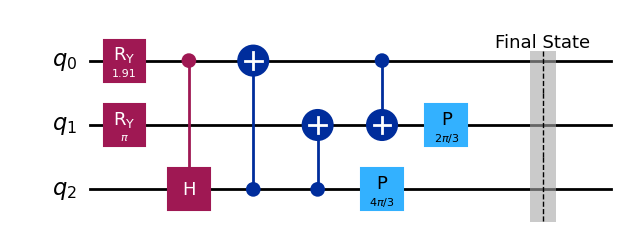

<IPython.core.display.Latex object>

----------------------------------------------------------------------------------------------------
Circuit for psi_1


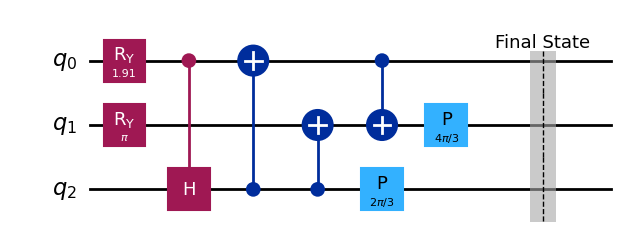

<IPython.core.display.Latex object>

----------------------------------------------------------------------------------------------------
Circuit for Inverse of psi_0:


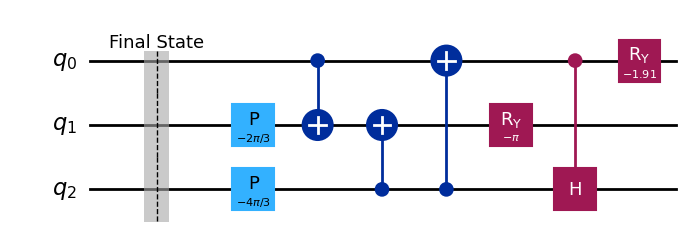

In [240]:
### The quantum Circuit that generates |psi_0> and the one which generates |psi_1>:


print(r'Circuit for psi_0')
qc = QuantumCircuit(3)

qc.ry(2*np.arccos(1/np.sqrt(3)),0)
qc.ry(2*np.arccos(0),1)
#qc.cx(0,2)
ch = HGate().control(1)
qc.append(ch, [0,2])
qc.cx(2,0)
qc.cx(2,1)
qc.cx(0,1)

qc.p(2*np.pi/3, 1)
qc.p(4*np.pi/3,2)

qc.save_statevector(label = 'Final State')
display(qc.draw('mpl'))
transp_qc = transpile(qc, simulator_aer)
res = simulator_aer.run(transp_qc, shots = 1).result()


display(res.data()['Final State'].draw(output = 'latex'))

U = qc.inverse()
print('--'*50)
print(r'Circuit for psi_1')
circ = QuantumCircuit(3)

circ.ry(2*np.arccos(1/np.sqrt(3)),0)
circ.ry(2*np.arccos(0),1)
#qc.cx(0,2)
ch = HGate().control(1)
circ.append(ch, [0,2])
circ.cx(2,0)
circ.cx(2,1)
circ.cx(0,1)

circ.p(4*np.pi/3, 1)
circ.p(2*np.pi/3,2)

circ.save_statevector(label = 'Final State')
display(circ.draw('mpl'))
transp_c = transpile(circ, simulator_aer)
res = simulator_aer.run(transp_c, shots = 1).result()


display(res.data()['Final State'].draw(output = 'latex'))
###The circuit for the unitary which takes psi_0 -> |000> and psi_1 to a state which does not contain the state |000>:

print('--'*50)
print('Circuit for Inverse of psi_0:')
display(U.draw('mpl'))

### Exercise 4
We start with the state:
$$
|\psi\rangle_0 = |00 \rangle
$$


We first build the state: 
$$
\frac{1}{\sqrt{3}}(|00\rangle + \sqrt{2}|01\rangle)
$$
This is done applying a $R_y(\theta)$ gate. This gate puts a qubit initialised at $|0\rangle$ and puts it in:
$$
R_Y(\theta)|0\rangle = cos(\frac{\theta}{2})|0\rangle + sin(\frac{\theta}{2})|1\rangle
$$
Therefore, the angle which we must rotate the qubit around the $Y$ axis is determined by:

$$
\theta = 2arccos(\frac{1}{\sqrt{3}}) = 2arcsin(\frac{\sqrt{2}}{\sqrt{3}})
$$
We multiply it by two because the definition of the $R_y$ gate. So we have created the state:

$$
|\psi\rangle_1 = (I \otimes R_Y(\theta) )|00\rangle = \frac{1}{\sqrt{3}}(|00\rangle + \sqrt{2}|01\rangle)
$$

Having done this we apply a Controlled Hadamard gate, where we apply hadamard to the first qubit, as long as the second qubit is in $|1\rangle$. This will get us to:

$$
|\psi\rangle_2 = \frac{1}{\sqrt{3}}(|00\rangle + (H \otimes I)\sqrt{2}|01\rangle) = \frac{1}{\sqrt{3}}(|00 \rangle + |01\rangle + |11 \rangle)
$$

We will finally apply a X gate to the first qubit:

$$
|\psi\rangle_{final} = (X \otimes I)\frac{1}{\sqrt{3}}(|00 \rangle + |01\rangle + |11 \rangle) 
$$
$$
|\psi\rangle_{final} = \frac{1}{\sqrt{3}}(|00 \rangle + |01\rangle + |10 \rangle)
$$

This process is exemplified below and a function which does exactly this is built after the example.

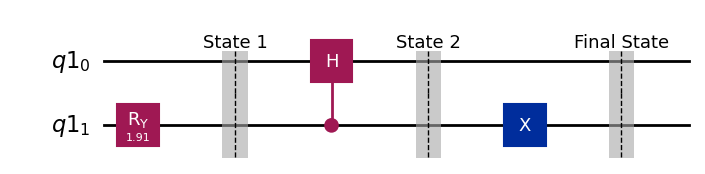

<IPython.core.display.Latex object>

In [11]:
from qiskit.circuit.library.standard_gates import HGate
from qiskit import transpile
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
    
qc.ry(2*np.arccos(1/np.sqrt(3)),1)
qc.save_statevector(label = 'State 1')
ch = HGate().control(1)
qc.append(ch, [1,0])
qc.save_statevector(label = 'State 2')
qc.x(1)
qc.save_statevector(label = 'Final State')
display(qc.draw('mpl'))
transp_qc = transpile(qc, simulator_aer)
res = simulator_aer.run(transp_qc, shots = 1).result()


display(res.data()['Final State'].draw(output = 'latex'))
    

Let us just quickly explore the inbetween states to check if our resoaning was correct:

OBS.: Remember that qiskit uses little endian notation!

In [12]:
display(res.data()['State 1'].draw(output = 'latex'))

<IPython.core.display.Latex object>

In [13]:
display(res.data()['State 2'].draw(output = 'latex'))

<IPython.core.display.Latex object>

Exactly as was described before. So let us build the function which receives an array of 2 qubits as input and it's "output" is a state vector.



--- Measuring Execution Time ---
--- Quantum Circuit ---


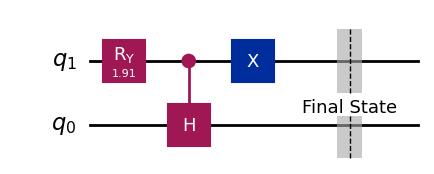


--- Final Statevector (LaTeX Output) ---


<IPython.core.display.Latex object>


Total time taken for display_final_statevector_circuit: 0.508393971 seconds


In [14]:
def ex_4():
    """
    Constructs a 2-qubit quantum circuit, applies a sequence of gates including
    a custom controlled Hadamard, and then displays the final statevector.

    The circuit operations are:
    1. Initializes a 2-qubit quantum circuit.
    2. Applies an Ry rotation gate to qubit 1 with an angle calculated to
       prepare a specific superposition (2*arccos(1/sqrt(3))).
    3. Saves the current statevector as 'State 1'.
    4. Defines a Controlled-Hadamard (CH) gate, where qubit 1 is the control
       and qubit 0 is the target.
    5. Appends this CH gate to the circuit on qubits [1, 0].
    6. Saves the current statevector as 'State 2'.
    7. Applies a Pauli-X gate to qubit 1.
    8. Saves the final statevector as 'Final State'.
    9. Draws the complete quantum circuit.
    10. Transpiles the circuit for the `AerSimulator`.
    11. Runs the transpiled circuit on `AerSimulator` for 1 shot.
    12. Extracts and displays the 'Final State' statevector in LaTeX format.

    This function is designed for demonstration and visualization, directly
    displaying the circuit and its final quantum state.

    Args:
        None: This function does not take any explicit arguments, as it
              constructs its own 2-qubit circuit internally.

    Returns:
        None: The function primarily performs side effects by displaying
              the circuit and statevector.

    Note:
        This function relies on a globally accessible `simulator_aer` object,
        which is expected to be an instance of `qiskit_aer.AerSimulator`.
        The `display` function for drawing might require a Jupyter Notebook
        or similar environment.
    """
    # Define a QuantumRegister for clarity, though QuantumCircuit(2) works directly too
    qc = QuantumCircuit(2)


    # Apply Ry gate to qubit 1
    # This prepares qubit 1 in a superposition where |0> amplitude is 1/sqrt(3)
    # and |1> amplitude is sqrt(2)/sqrt(3) if starting from |0>.
    qc.ry(2 * np.arccos(1 / np.sqrt(3)), 1)
    

    # Define a Controlled-Hadamard (CH) gate
    # HGate().control(1) creates a controlled H where the single control qubit
    # is the first qubit in the qargs list provided to .append().
    ch = HGate().control(1)
    # Append the CH gate: qubit 1 is control, qubit 0 is target
    qc.append(ch, [1, 0])
    

    # Apply Pauli-X to qubit 1
    qc.x(1)
    qc.save_statevector(label='Final State') # Save the state after X

    # Display the circuit
    # Using 'mpl' for Matplotlib drawing, reverse_bits=True often makes Qiskit
    # circuit diagrams match the convention where q0 is at the bottom.
    # circuit_drawer(qc.draw('mpl', reverse_bits=True)) # Use this for Jupyter Notebook

    print("--- Quantum Circuit ---")
    display(qc.draw('mpl', reverse_bits=True))


    # Transpile the circuit for the simulator
    transp_qc = transpile(qc, simulator_aer)

    # Run the circuit on the simulator
    res = simulator_aer.run(transp_qc, shots=1).result()

    # Extract and display the 'Final State' statevector in LaTeX format
    print("\n--- Final Statevector (LaTeX Output) ---")
    final_statevector = res.data()['Final State']
    # If running in a print-only environment, this will output the LaTeX string.
    # In a Jupyter environment, `display()` would render it.
    display(final_statevector.draw(output='latex'))

# --- Timing the function execution ---
print("\n--- Measuring Execution Time ---")
start_time = time.perf_counter()
ex_4()
end_time = time.perf_counter()
time_elapsed = end_time - start_time
print(f"\nTotal time taken for display_final_statevector_circuit: {time_elapsed:.9f} seconds")


### Exercise 5

In [15]:
def ex_5(n,parity): #number of qubits, parity
    qc = QuantumCircuit(n)
    for i in range(n-1):
        qc.h(i)
    if parity ==1:
        qc.x(n-1)
    for i in range(n-1):
        qc.cx(i,n-1)
    qc.save_statevector(label='final state')
    res = simulator_aer.run(qc, shots=1).result()
    state = res.data()['final state']
    
    return qc,state
    
        

In [16]:
def ex_5(n: int, parity: int):
    """
    Constructs a quantum circuit with 'n' qubits to prepare a superposition
    of states that have a specific parity (even or odd) in the number of 1s.

    The circuit works by:
    1. Initializing 'n' qubits in the |0> state.
    2. Applying Hadamard gates to the first 'n-1' qubits to create a superposition
       of all possible states for these qubits.
    3. If `parity` is 1 (odd parity desired), an X-gate is applied to the last qubit (n-1).
       This flips the parity of the desired subspace from even to odd.
    4. Applying CNOT gates from each of the first 'n-1' qubits to the last qubit (n-1).
       This effectively computes the parity of the first 'n-1' qubits onto the last qubit.
       The last qubit will be |0> if the parity of the first 'n-1' qubits is even,
       and |1> if it's odd.
    5. Saves the final statevector.

    Args:
        n (int): The number of qubits in the quantum circuit. Must be n >= 1.
        parity (int): The desired parity of 1s in the final state.
                      - 0: For states with an even number of 1s.
                      - 1: For states with an odd number of 1s.

    Returns:
        Statevector: The final quantum statevector of the circuit, which is an
                     equal superposition of all basis states matching the
                     specified parity.

    Raises:
        ValueError: If n < 1.
        ValueError: If parity is not 0 or 1.
    """
    if n < 1:
        raise ValueError("Number of qubits (n) must be at least 1.")
    if parity not in [0, 1]:
        raise ValueError("Parity must be 0 (even) or 1 (odd).")

    qc = QuantumCircuit(n)

    # Apply Hadamard to the first n-1 qubits
    # This creates a superposition of all 2^(n-1) states for these qubits.
    for i in range(n - 1):
        qc.h(i)

    # If odd parity is desired, flip the last qubit.
    # This effectively flips the "target parity" for the final state.
    if parity == 1:
        qc.x(n - 1)

    # Apply CNOT gates from each of the first n-1 qubits to the last qubit (n-1).
    # This computes the parity of the first n-1 qubits onto the last qubit.
    # The last qubit acts as an "ancilla" to store the parity.
    for i in range(n - 1):
        qc.cx(i, n - 1)

    qc.save_statevector(label='final state') # Save the final statevector

    # Run the circuit on the simulator
    
    res = simulator_aer.run(qc, shots=1).result()
    state = res.data()['final state'] # Extract the statevector

    return state

# --- Test Cases and Timing for ex_5 ---
if __name__ == "__main__": 
    print("--- Testing ex_5 Function and Measuring Time ---")

    N_values = [1, 2, 3, 4, 5, 8, 10, 12,20,21]
                                          

    for n in N_values:
        print(f"\n--- Testing for n = {n} Qubits ---")

        # Test for even parity (parity = 0)
        start_time_even = time.perf_counter()
        final_state_even = ex_5(n, 0)
        end_time_even = time.perf_counter()
        time_elapsed_even = end_time_even - start_time_even

        print(f"  Parity = 0 (Even):")
        # For very small N, uncomment to print the full statevector to verify
        # if n <= 3:
        #     print(f"    Final Statevector (Even): {final_state_even}")
        print(f"    Time taken: {time_elapsed_even:.9f} seconds")

        # Test for odd parity (parity = 1)
        start_time_odd = time.perf_counter()
        final_state_odd = ex_5(n, 1)
        end_time_odd = time.perf_counter()
        time_elapsed_odd = end_time_odd - start_time_odd

        print(f"  Parity = 1 (Odd):")
        # For very small N, uncomment to print the full statevector to verify
        # if n <= 3:
        #     print(f"    Final Statevector (Odd): {final_state_odd}")
        print(f"    Time taken: {time_elapsed_odd:.9f} seconds")


    print("\n--- End of ex_5 Testing ---")


--- Testing ex_5 Function and Measuring Time ---

--- Testing for n = 1 Qubits ---
  Parity = 0 (Even):
    Time taken: 0.002481059 seconds
  Parity = 1 (Odd):
    Time taken: 0.002325172 seconds

--- Testing for n = 2 Qubits ---
  Parity = 0 (Even):
    Time taken: 0.001998799 seconds
  Parity = 1 (Odd):
    Time taken: 0.002520395 seconds

--- Testing for n = 3 Qubits ---
  Parity = 0 (Even):
    Time taken: 0.002852830 seconds
  Parity = 1 (Odd):
    Time taken: 0.002110614 seconds

--- Testing for n = 4 Qubits ---
  Parity = 0 (Even):
    Time taken: 0.001994196 seconds
  Parity = 1 (Odd):
    Time taken: 0.002052118 seconds

--- Testing for n = 5 Qubits ---
  Parity = 0 (Even):
    Time taken: 0.001844201 seconds
  Parity = 1 (Odd):
    Time taken: 0.001975725 seconds

--- Testing for n = 8 Qubits ---
  Parity = 0 (Even):
    Time taken: 0.002459745 seconds
  Parity = 1 (Odd):
    Time taken: 0.004408563 seconds

--- Testing for n = 10 Qubits ---
  Parity = 0 (Even):
    Time take

In my machine for more then 22 qubits it always exceeds the 1 second limit.

#### example with 5 qubits:

In [17]:
n= 5
parity_0 = 0
parity_1 = 1

statevector_0 = ex_5(n, parity_0)

statevector_1 = ex_5(n, parity_1)

print("---Example for n = 5: --- ")
print('Parity = 0 (even):')
display(statevector_0.draw('latex'))
print('Parity = 1 (odd):')
display(statevector_1.draw('latex'))

---Example for n = 5: --- 
Parity = 0 (even):


<IPython.core.display.Latex object>

Parity = 1 (odd):


<IPython.core.display.Latex object>

### Exercise 6:

In [9]:
def ex_6(two_qubit):
    
    """
    Receives a 2-qubit quantum circuit representing a Bell state,
    measures it in the Bell basis, and returns a remapped integer outcome.

    This function is designed to take one of the Bell state preparation circuits
    (e.g., from `phi_plus()`, `phi_minus()`, `psi_plus()`, `psi_minus()`),
    compose it with a new circuit, perform a Bell basis measurement, and
    return a specific integer based on the measurement outcome.

    The Bell basis measurement transforms the Bell states back to computational
    basis states as follows:
    - |Phi+> (|00>+|11>)/sqrt(2) -> '00'
    - |Phi-> (|00>-|11>)/sqrt(2) -> '01'
    - |Psi+> (|01>+|10>)/sqrt(2) -> '10'
    - |Psi-> (|01>-|10>)/sqrt(2) -> '11'

    The final integer mapping applied is:
    - If measurement is '00' (integer 0) -> returns 0
    - If measurement is '01' (integer 1) -> returns 2 (remapped)
    - If measurement is '10' (integer 2) -> returns 1 (remapped)
    - If measurement is '11' (integer 3) -> returns 3

    Args:
        bell_state_prep_circuit (QuantumCircuit): A 2-qubit quantum circuit
                                                  that prepares one of the Bell states.

    Returns:
        int: An integer (0, 1, 2, or 3) representing the remapped measurement
             outcome in the Bell basis.

    Raises:
        ValueError: If `bell_state_prep_circuit` does not have exactly 2 qubits.

    """
    if two_qubit.num_qubits != 2:
        raise ValueError("The input two_qubit must be a 2-qubit circuit.")

    
    qc = QuantumCircuit(2)
    qubit_map = list(range(two_qubit.num_qubits))

    # Using compose:
    combined_qc = qc.compose(two_qubit, qubits=qubit_map)
    
    ### receives two qubits in the bell state
    
    combined_qc.cx(1,0)
    combined_qc.h(1)
    
    combined_qc.measure_all()
    
    res = simulator_aer.run(combined_qc, shots = 1).result()
    count = res.get_counts()
    
    ### Returning 0,1,2,3 instead of binary:
    
    key = list(count.keys())[0]
    integer = int(key, 2)
    if integer == 2:
        ans = 1
    elif integer ==1:
        ans = 2
    else:
        ans = integer
        
    return ans


### Bell states:


def phi_plus() -> QuantumCircuit:
    """
    Prepares a 2-qubit quantum circuit in the |Phi+> Bell state.

    The |Phi+> state is (1/sqrt(2)) * (|00> + |11>).
    It is prepared from the |00> state using a Hadamard gate on the second qubit (index 1)
    followed by a CNOT gate with qubit 1 as control and qubit 0 as target.

    Returns:
        QuantumCircuit: A 2-qubit circuit prepared in the |Phi+> Bell state.
    """
    qc = QuantumCircuit(2)
    qc.h(1)    # Apply Hadamard to qubit 1
    qc.cx(1, 0) # Apply CNOT with control=qubit 1, target=qubit 0
    return qc

def phi_minus() -> QuantumCircuit:
    """
    Prepares a 2-qubit quantum circuit in the |Phi-> Bell state.

    The |Phi-> state is (1/sqrt(2)) * (|00> - |11>).
    It is prepared from the |00> state using a Hadamard gate on qubit 1,
    a Pauli-Z gate on qubit 1, followed by a CNOT gate from qubit 1 to qubit 0.

    Returns:
        QuantumCircuit: A 2-qubit circuit prepared in the |Phi-> Bell state.
    """
    qc = QuantumCircuit(2)
    qc.h(1)    # Apply Hadamard to qubit 1
    qc.z(1)    # Apply Pauli-Z to qubit 1
    qc.cx(1, 0) # Apply CNOT with control=qubit 1, target=qubit 0
    return qc

def psi_plus() -> QuantumCircuit:
    """
    Prepares a 2-qubit quantum circuit in the |Psi+> Bell state.

    The |Psi+> state is (1/sqrt(2)) * (|01> + |10>).
    It is prepared from the |00> state by applying a Hadamard gate to qubit 1,
    a Pauli-X gate to qubit 0 (to get |01>), followed by a CNOT gate
    from qubit 1 to qubit 0.

    Returns:
        QuantumCircuit: A 2-qubit circuit prepared in the |Psi+> Bell state.
    """
    qc = QuantumCircuit(2)
    qc.h(1)    # Apply Hadamard to qubit 1
    qc.x(0)    # Apply Pauli-X to qubit 0 (transforms |00> to |01> before entanglement)
    qc.cx(1, 0) # Apply CNOT with control=qubit 1, target=qubit 0
    return qc

def psi_minus() -> QuantumCircuit:
    """
    Prepares a 2-qubit quantum circuit in the |Psi-> Bell state.

    The |Psi-> state is (1/sqrt(2)) * (|01> - |10>).
    It is prepared from the |00> state by applying a Hadamard gate to qubit 1,
    a Pauli-X gate to qubit 0, a Pauli-Z gate to qubit 1, followed by a CNOT gate
    from qubit 1 to qubit 0.

    Returns:
        QuantumCircuit: A 2-qubit circuit prepared in the |Psi-> Bell state.
    """
    qc = QuantumCircuit(2)
    qc.h(1)    # Apply Hadamard to qubit 1
    qc.x(0)    # Apply Pauli-X to qubit 0
    qc.z(1)    # Apply Pauli-Z to qubit 1
    qc.cx(1, 0) # Apply CNOT with control=qubit 1, target=qubit 0
    return qc


In [10]:
print("--- Testing ex_6 with different Bell State Preparations ---")

test_cases = {
    "Phi+": phi_plus,
    "Phi-": phi_minus,
    "Psi+": psi_plus,
    "Psi-": psi_minus
}

for name, prep_function in test_cases.items():
    start_time = time.perf_counter()

    # Call the Bell state preparation function to get the circuit
    bell_circuit = prep_function()
    
    # Pass the prepared Bell circuit to ex_6
    result = ex_6(bell_circuit)

    end_time = time.perf_counter()
    time_elapsed = end_time - start_time

    print(f"Bell State: {name}")
    print(f"  Output: {result}")
    print(f"  Time taken (including Bell state prep and ex_6 execution): {time_elapsed:.9f} seconds")
    print("-" * 40)

# Optional: Run multiple times for average timing
print("\n--- Averaging Time Measurements (100 runs per Bell State) ---")
num_runs = 100

for name, prep_function in test_cases.items():
    total_time = 0
    for _ in range(num_runs):
        bell_circuit = prep_function()
        start_time = time.perf_counter()
        ex_6(bell_circuit)
        end_time = time.perf_counter()
        total_time += (end_time - start_time)
    
    average_time = total_time / num_runs
    print(f"Bell State: {name}")
    print(f"  Average time over {num_runs} runs: {average_time:.9f} seconds")
    print("-" * 40)

--- Testing ex_6 with different Bell State Preparations ---
Bell State: Phi+
  Output: 0
  Time taken (including Bell state prep and ex_6 execution): 0.005951397 seconds
----------------------------------------
Bell State: Phi-
  Output: 1
  Time taken (including Bell state prep and ex_6 execution): 0.004985684 seconds
----------------------------------------
Bell State: Psi+
  Output: 2
  Time taken (including Bell state prep and ex_6 execution): 0.006660742 seconds
----------------------------------------
Bell State: Psi-
  Output: 3
  Time taken (including Bell state prep and ex_6 execution): 0.004009058 seconds
----------------------------------------

--- Averaging Time Measurements (100 runs per Bell State) ---
Bell State: Phi+
  Average time over 100 runs: 0.002235319 seconds
----------------------------------------
Bell State: Phi-
  Average time over 100 runs: 0.002017562 seconds
----------------------------------------
Bell State: Psi+
  Average time over 100 runs: 0.00197266

### Exercise 7

We test if we have alternating qubits two by two and using an auxiliary qubit. Our test uses two qubits, a third auxiliary qubit and CNOTs. We apply a CNOT to qubit 1, as control, and the aux, as target. The same will be done to the other qubit. If they are different it will flip the aux qubit, if they are the same it will leave it at its initial state. 


$$
CNOT_{x_1\rightarrow y}|x_1x_2\rangle|z\rangle = |x_1x_2\rangle|(z\oplus f(x_1))\oplus f(x_2)\rangle
$$


If $f(x_1) = f(x_2) \rightarrow x_1 = x_2$ then $|(z\oplus f(x_1))\oplus f(x_2)\rangle = |z\rangle$. 

However, if $f(x_1) \neq f(x_2) \rightarrow x_1 \neq x_2$, which means $|(z\oplus f(x_1))\oplus f(x_2)\rangle = |\bar{z}\rangle$

We then use a CNOT which has the auxiliary qubits as control and the final $|y\rangle$ as target. If they all have been flipped, which means every two qubits have different states - the same as saying the bits alternate, since the two possible states are 0 and 1- then the $|y\rangle$ will be $1$. Otherwise, in the case where there are at least two subsequent qubits which are the same, the auxiliary qubits will not all be equal to $|1\rangle$ and $|y\rangle = |0\rangle$.

The test cases use either all equal bitstrings or alternating bitstrings of the type $010101 \dots$, however you may test any bitstring you wish on the cell right after the tests.

In [18]:
def ex_7(vec: np.ndarray) -> Statevector:
    """
    Applies a series of quantum operations to an initial statevector `vec`,
    involving auxiliary qubits, specific CNOT operations, a multi-controlled
    X gate, and then extracts a dominant statevector component.

    The function performs the following steps:
    1.  Determines the number of original qubits `N` from the length of `vec`
        (assuming `len(vec)` is a power of 2).
    2.  Initializes an `N`-qubit quantum circuit.
    3.  Initializes the first `N` qubits of the circuit with the input `vec`.
    4.  Adds `N` auxiliary qubits (as `extra_qubits`) and one classical bit
        (`measure_bit`) to the circuit. The total quantum qubits become `2*N`.
        The auxiliary qubits are implicitly initialized to |0>.
    5.  Applies a sequence of `N-1` pairs of CNOT gates. For each `i` from 0 to `N-2`:
        - `qc.cx(i, i+N)`: CNOT from original qubit `i` to auxiliary qubit `i` (qubit `i+N`).
        - `qc.cx(i+1, i+N)`: CNOT from original qubit `i+1` to the *same* auxiliary qubit `i` (qubit `i+N`).
        This effectively stores the XOR sum `(q_i XOR q_{i+1})` onto auxiliary qubit `i+N`.
        So, auxiliary qubits `N` through `2*N-2` will hold these adjacent-pair parities.
    6.  Defines a set of control qubits for a multi-controlled X gate: these are
        auxiliary qubits `N` through `2*N-2` (i.e., `extra_qubits[0]` to `extra_qubits[N-2]`).
    7.  Defines the target qubit for the multi-controlled X gate as the last
        auxiliary qubit (`2*N-1`, which is `extra_qubits[N-1]`).
    8.  Applies the multi-controlled X gate. The target qubit `2*N-1` is flipped
        if and only if *all* of the `N-1` auxiliary control qubits are in the |1> state.
        This means the target qubit `2*N-1` is flipped if and only if
        `(q_0 != q_1) AND (q_1 != q_2) AND ... AND (q_{N-2} != q_{N-1})`.
    9.  Measures only the target qubit (`2*N-1`) into the classical bit (`measure_bit[0]`).
    10. Saves the complete statevector (including all `2*N` quantum qubits).
    11. Runs the circuit on `simulator_aer` for 1 shot to get the statevector.
    12. Performs a partial trace, tracing out the `N-1` auxiliary control qubits.
        The resulting density matrix `p_trace` represents the state of the original
        `N` qubits and the final auxiliary qubit (`2*N-1`).
    13. Computes the eigenvalues and eigenvectors of `p_trace`.
    14. Extracts the eigenvector corresponding to the maximum eigenvalue. This is a common
        technique to retrieve the dominant pure state from a (possibly mixed) density matrix.
    15. Converts this eigenvector (NumPy array) into a Qiskit `Statevector` object.

    Args:
        vec (np.ndarray): The initial statevector for the first `N` qubits.
                          Its length must be a power of 2.

    Returns:
        Statevector: The reduced `Statevector` object representing the dominant component
                     of the quantum state after all operations and partial tracing.
                     This statevector will have `N+1` qubits.

    Raises:
        ValueError: If the length of `vec` is not a power of 2.
        Exception: Propagates exceptions from Qiskit or NumPy if circuit construction,
                   simulation, or linear algebra operations fail.
    """
    
    
    N = int(np.log2(len(vec)))
    if 2**N != len(vec):
        raise ValueError("Length of input vector `vec` must be a power of 2.")

    qc = QuantumCircuit(N) # Circuit for the original N qubits
    qc.initialize(vec, [i for i in range(0, N)])

    # N auxiliary qubits and 1 classical bit
    extra_qubits = QuantumRegister(N) # N aux qubits: aux_0 to aux_N-1
    ### N-1 to determine parity two by two and qubit |y>
    measure_bit = ClassicalRegister(1) # One classical bit for measurement

    qc.add_register(extra_qubits)
    qc.add_register(measure_bit)

    # Apply CNOTs to compute adjacent XOR parities on auxiliary qubits
    # aux_i (qubit N+i) stores q_i XOR q_{i+1}
    for i in range(0, N - 1):
        qc.cx(i, i + N)       # CNOT from q_i to aux_i
        qc.cx(i + 1, i + N)   # CNOT from q_{i+1} to aux_i (same aux qubit)

    # Define controls and target for the multi-controlled X gate
    # Control qubits are aux_0 to aux_{N-2} (qubits N to 2*N-2)
    control_qubits = [i for i in range(N, 2 * N - 1)]
    # Target qubit is aux_{N-1} (qubit 2*N-1)
    target_qubit_for_mcx = 2 * N - 1

    # Apply the multi-controlled X gate
    # This flips aux_{N-1} if all aux_0 to aux_{N-2} are |1>
    if N > 1: # mcx requires at least one control qubit
        # If N=1, control_qubits will be empty, so skip mcx
        qc.mcx(control_qubits, target_qubit_for_mcx)

    # Measure the last auxiliary qubit (target_qubit_for_mcx)
    qc.measure(target_qubit_for_mcx, 0)

    # Save the full statevector before partial trace
    qc.save_statevector(label='state')

    # Transpile and run the circuit
    
    res = simulator_aer.run(qc, shots=1).result()
    full_state_vector = res.data()['state']

    # Perform partial trace to remove the intermediate auxiliary qubits
    # The qubits to trace out are the control_qubits for mcx.
    # The result will be a density matrix for the original N qubits plus the target_qubit_for_mcx.
    # Qubit indices for partial_trace are 0-indexed across the *full* system.
    # The `control_qubits` list already contains the correct indices for the aux controls.
    traced_out_qubits_indices = control_qubits
    p_trace = partial_trace(full_state_vector, traced_out_qubits_indices)

    # Get eigenvalues and eigenvectors of the density matrix
    # eigh returns eigenvalues in ascending order
    eigvals, eigvecs = eigh(p_trace.data)

    # Find the index of the maximum eigenvalue (corresponding to the dominant pure state)
    max_idx = eigvals.argmax()

    # Extract the corresponding eigenvector
    reduced_statevector_data = eigvecs[:, max_idx]

    # Convert the NumPy array to a Qiskit Statevector object
    final_statevector_qiskit = Statevector(reduced_statevector_data)

    return final_statevector_qiskit
            
    
def basis_ket_to_array(bitstring: str) -> np.ndarray:
    """
    Converts a computational basis state represented as a bitstring (e.g., '00', '101')
    into its corresponding NumPy array (statevector) representation.

    The function determines the number of qubits `n` from the length of the `bitstring`.
    It then creates a complex NumPy array of size 2^n, with all elements initialized to zero,
    and sets the element at the index corresponding to the decimal value of the `bitstring` to 1.0.

    Args:
        bitstring (str): A string representing the computational basis state,
                         e.g., '0' for |0>, '1' for |1>, '01' for |01>, '110' for |110>.
                         The string must only contain '0's and '1's.

    Returns:
        np.ndarray: A 1D NumPy array (complex dtype) representing the statevector
                    of the specified basis ket. This array will have a '1.0' at
                    the index corresponding to the bitstring's decimal value
                    and '0.0' elsewhere.

    Raises:
        ValueError: If `bitstring` is empty or contains characters other than '0' or '1'.

    Example:
        >>> basis_ket_to_array('00')
        array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])
    """
    
    
    if not bitstring:
        raise ValueError("Input bitstring cannot be empty.")
    if not all(c in '01' for c in bitstring):
        raise ValueError("Input bitstring must contain only '0' or '1' characters.")

    n = len(bitstring)
    index = int(bitstring, 2) # Convert binary string to decimal index

    # Create a zero array of size 2^n with complex data type
    vec = np.zeros(2**n, dtype=complex)

    # Set the corresponding index to 1.0
    vec[index] = 1.0

    return vec    
    

# --- New Test Cases for N from 1 to 7 ---
if __name__ == "__main__":
    print("\n--- New Test Cases: N from 1 to 7 with specific patterns ---")

    N_values = range(1, 8) # N from 1 to 7

    for n in N_values:
        print(f"\n--- Testing for N = {n} Qubits ---")

        # Test Case 1: Alternating bitstring (01010...)
        alternating_bitstring = ''.join(['01'[(i % 2)] for i in range(n)])
        
        print(f"  Test Case 1: Initial state from alternating string '{alternating_bitstring}'")
        try:
            # Convert bitstring to initial NumPy array
            input_vec_alt = basis_ket_to_array(alternating_bitstring)
            
            # Time the ex_7 function call
            start_time_alt = time.perf_counter()
            returned_state_alt = ex_7(input_vec_alt)
            end_time_alt = time.perf_counter()
            time_elapsed_alt = end_time_alt - start_time_alt
            
            print(f"    Returned Statevector has {returned_state_alt.num_qubits} qubits.")
            print(f"    Time taken by ex_7: {time_elapsed_alt:.9f} seconds")
            print(f"    Final Statevector (LaTeX):")
            # This will print the raw LaTeX string. For rendering, you'd need a LaTeX-enabled environment.
            display(returned_state_alt.draw(output='latex'))
        except ValueError as e:
            print(f"    Error in Test Case 1: {e}")
        except Exception as e:
            print(f"    An unexpected error occurred in Test Case 1: {e}")

        # Test Case 2: All zeros bitstring (00000...)
        all_zeros_bitstring = '0' * n
        
        print(f"\n  Test Case 2: Initial state from all zeros string '{all_zeros_bitstring}'")
        try:
            # Convert bitstring to initial NumPy array
            input_vec_zeros = basis_ket_to_array(all_zeros_bitstring)

            # Time the ex_7 function call
            start_time_zeros = time.perf_counter()
            returned_state_zeros = ex_7(input_vec_zeros)
            end_time_zeros = time.perf_counter()
            time_elapsed_zeros = end_time_zeros - start_time_zeros
            
            print(f"    Returned Statevector has {returned_state_zeros.num_qubits} qubits.")
            print(f"    Time taken by ex_7: {time_elapsed_zeros:.9f} seconds")
            print(f"    Final Statevector (LaTeX):")
            # This will print the raw LaTeX string. For rendering, you'd need a LaTeX-enabled environment.
            display(returned_state_zeros.draw(output='latex'))
        except ValueError as e:
            print(f"    Error in Test Case 2: {e}")
        except Exception as e:
            print(f"    An unexpected error occurred in Test Case 2: {e}")

    print("\n--- End of all Test Cases for basis_ket_to_array and ex_7 ---")

    


--- New Test Cases: N from 1 to 7 with specific patterns ---

--- Testing for N = 1 Qubits ---
  Test Case 1: Initial state from alternating string '0'
    Returned Statevector has 2 qubits.
    Time taken by ex_7: 0.007703430 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 2: Initial state from all zeros string '0'
    Returned Statevector has 2 qubits.
    Time taken by ex_7: 0.004382692 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


--- Testing for N = 2 Qubits ---
  Test Case 1: Initial state from alternating string '01'
    Returned Statevector has 3 qubits.
    Time taken by ex_7: 0.013337687 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 2: Initial state from all zeros string '00'
    Returned Statevector has 3 qubits.
    Time taken by ex_7: 0.005718110 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


--- Testing for N = 3 Qubits ---
  Test Case 1: Initial state from alternating string '010'
    Returned Statevector has 4 qubits.
    Time taken by ex_7: 0.004901415 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 2: Initial state from all zeros string '000'
    Returned Statevector has 4 qubits.
    Time taken by ex_7: 0.008265101 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


--- Testing for N = 4 Qubits ---
  Test Case 1: Initial state from alternating string '0101'
    Returned Statevector has 5 qubits.
    Time taken by ex_7: 0.005427975 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 2: Initial state from all zeros string '0000'
    Returned Statevector has 5 qubits.
    Time taken by ex_7: 0.005185985 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


--- Testing for N = 5 Qubits ---
  Test Case 1: Initial state from alternating string '01010'
    Returned Statevector has 6 qubits.
    Time taken by ex_7: 0.008383085 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 2: Initial state from all zeros string '00000'
    Returned Statevector has 6 qubits.
    Time taken by ex_7: 0.009950260 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


--- Testing for N = 6 Qubits ---
  Test Case 1: Initial state from alternating string '010101'
    Returned Statevector has 7 qubits.
    Time taken by ex_7: 0.010129067 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 2: Initial state from all zeros string '000000'
    Returned Statevector has 7 qubits.
    Time taken by ex_7: 0.010275832 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


--- Testing for N = 7 Qubits ---
  Test Case 1: Initial state from alternating string '0101010'
    Returned Statevector has 8 qubits.
    Time taken by ex_7: 0.051604418 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 2: Initial state from all zeros string '0000000'
    Returned Statevector has 8 qubits.
    Time taken by ex_7: 0.068093990 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


--- End of all Test Cases for basis_ket_to_array and ex_7 ---


Example with 5 qubits: 

Inital state: $|x\rangle = |10101\rangle$
Final desired state: $|y \oplus f(x)\rangle|01010\rangle = |1\rangle|01010\rangle$

You may change the bitstring for any case you prefer.

In [19]:
x = '10101'
vec = basis_ket_to_array(x) ### Transforms the bitstring you would like to pass in a vector which represents it;

state = ex_7(vec)

display(state.draw('latex'))
#display(circ.draw('mpl'))



<IPython.core.display.Latex object>

In [297]:
sum([i for i in range(0,1+1)])

1

In [280]:
for i in range(4,4+3):
    print(i)

4
5
6


### Exercise 8

In [ ]:
def ex_8(vec):
    N = int(np.log2(len(vec)))
    if 2**N != len(vec):
        raise ValueError("Length of input vector `vec` must be a power of 2.")

    qc = QuantumCircuit(N) # Circuit for the original N qubits
    qc.initialize(vec, [i for i in range(0, N)])
    
    if N < 7:
        period_max= int(np.ceil(N/2)) 
        period_qubits = sum([i for i in range(0, period_max+1)])
        extra = period_qubits+ 1 
        # N auxiliary qubits and 1 classical bit
        extra_qubits = QuantumRegister(extra) # N aux qubits: aux_0 to aux_N-1
        ### N-1 to determine parity two by two and qubit |y>
        measure_bit = ClassicalRegister(1) # One classical bit for measurement
       
        qc.add_register(extra_qubits)
        qc.add_register(measure_bit) 
        total = qc.num_qubits
        for i in range(N,N +period_qubits):
            qc.x(i)
        
        # P = N-1:
        qc.barrier()
        qc.cx(0,N)
        qc.cx(N-1,N)
        qc.barrier()
        qc.cx(N, total - 1)
        qc.barrier()

        control_qubits = [i for i in range(N, N+period_qubits)]
        if period_max >=2: 
        # P= N-2:
            qc.barrier()
            qc.cx(0,N+1)
            qc.cx((N-2),N+1)
            qc.cx(1,N+2)
            qc.cx(1 + N-2,N+2)
            qc.barrier()
            qc.mcx([N+1,N+2], total - 1)
        
            qc.mcx(control_qubits,total - 1)
            
    elif N == 7:
        period_max= int(np.floor(N/2))
        period_qubits = sum([i for i in range(0, period_max+1)])
        total = N + period_qubits+ 1
        qc = QuantumCircuit(total) # This re-initializes qc, losing the vec initialization
        # Note: The input 'vec' is not applied to 'qc' in this branch.
        # If 'vec' is intended to initialize the N qubits, qc.initialize(vec, range(N))
        # would need to be added here.
        
        # Add registers for aux qubits and classical bit in this branch
        extra_qubits = QuantumRegister(period_qubits + 1)
        measure_bit = ClassicalRegister(1)
        qc.add_register(extra_qubits)
        qc.add_register(measure_bit)

        # Initialize aux qubits to |1>
        for i in range(N, N + period_qubits + 1):
            qc.x(i)

        # P = N-1:
        qc.barrier()
        qc.cx(0,N)
        qc.cx(N-1,N)
        qc.barrier()
        qc.cx(N, total - 1)
        qc.barrier()

        control_qubits = [i for i in range(N, N+period_qubits)]
        # P= N-2:
        qc.barrier()
        qc.cx(0,N+1)
        qc.cx((N-2),N+1)
        qc.cx(1,N+2)
        qc.cx(1 + N-2,N+2)
        qc.barrier()
        qc.mcx([N+1,N+2], total - 1)
            
        #qc.mcx(control_qubits,total - 1) # This line remains commented as per original request
        # P = N - 3
        qc.barrier()
        qc.cx(0,N+3)
        qc.cx((N-3),N+3)
        qc.cx(1,N+4)
        qc.cx(1 + N-3,N+4)
        qc.cx(2,N+5)
        qc.cx(2+N-3,N+5)
        qc.barrier()
        qc.mcx([N+3,N+4,N+5], total - 1)
            
            
        
        
    # Measure the last auxiliary qubit (target_qubit_for_mcx)
    qc.measure(total-1, 0)

    # Save the full statevector before partial trace
    qc.save_statevector(label='state')

    # Transpile and run the circuit
    
    res = simulator_aer.run(qc, shots=1).result()
    full_state_vector = res.data()['state']    
    # Perform partial trace to remove the intermediate auxiliary qubits
    # The qubits to trace out are the control_qubits for mcx.
    # The result will be a density matrix for the original N qubits plus the target_qubit_for_mcx.
    # Qubit indices for partial_trace are 0-indexed across the *full* system.
   
    traced_out_qubits_indices = control_qubits
    p_trace = partial_trace(full_state_vector, traced_out_qubits_indices)

    # Get eigenvalues and eigenvectors of the density matrix
    # eigh returns eigenvalues in ascending order
    eigvals, eigvecs = eigh(p_trace.data)

    # Find the index of the maximum eigenvalue (corresponding to the dominant pure state)
    max_idx = eigvals.argmax()

    # Extract the corresponding eigenvector
    reduced_statevector_data = eigvecs[:, max_idx]

    # Convert the NumPy array to a Qiskit Statevector object
    final_statevector_qiskit = Statevector(reduced_statevector_data)

    return final_statevector_qiskit

def basis_ket_to_array(bitstring: str) -> np.ndarray:
    """Converts a bitstring to its corresponding statevector (NumPy array)."""
    n = len(bitstring)
    index = int(bitstring, 2)
    vec = np.zeros(2**n, dtype=complex)
    vec[index] = 1.0
    return vec

# Helper function to check if a bitstring is periodic based on the definition
def is_bitstring_periodic_classical(s: str) -> bool:
    N = len(s)
    if N < 2: # Period P requires P <= N-1, so N must be at least 2.
        return False
    for P in range(1, N): # P from 1 to N-1
        is_P_valid = True
        for i in range(0, N - P): # i from 0 to N-P-1 (inclusive of N-P-1)
            if s[i] != s[i+P]:
                is_P_valid = False
                break
        if is_P_valid:
            return True # Found a period
    return False # No period found

# --- Test Cases and Timing for ex_8 ---
if __name__ == "__main__":
    print("--- Testing ex_8 Function and Measuring Time ---")

    N_values = range(1, 8) # N from 1 to 7

    # Define specific test bitstrings for each N
    # Include both classically periodic and non-periodic examples
    test_bitstrings_by_N = {
        1: ["0", "1"], # Not periodic by definition (N<2)
        2: ["00", "01", "11"], # 00, 11 are periodic (P=1); 01 is not
        3: ["000", "010", "001", "111"], # 000, 010, 111 are periodic; 001 is not
        4: ["0000", "0101", "0001", "1010"], # 0000, 0101, 1010 are periodic; 0001 is not
        5: ["00000", "01010", "00001", "10101"], # 00000, 01010, 10101 are periodic; 00001 is not
        6: ["000000", "010101", "011010", "000001", "101010"], # 000000, 010101, 011010, 101010 are periodic; 000001 is not
        7: ["0000000", "0101010", "0110100", "0000001", "1010101"] # Examples for N=7
    }
    
    for n_val in N_values:
        print(f"\n--- Testing for N = {n_val} Qubits ---")

        # Select a few representative bitstrings for each N
        bitstrings_to_test = test_bitstrings_by_N.get(n_val, [])
        if not bitstrings_to_test:
            print(f"  No specific test bitstrings defined for N={n_val}. Skipping.")
            continue

        for bitstring in bitstrings_to_test:
            print(f"  Input Bitstring: '{bitstring}' (Length N={n_val})")
            
            # Convert bitstring to initial NumPy array
            input_vec_array = basis_ket_to_array(bitstring)

            # --- Perform classical periodicity check for comparison ---
            is_periodic_classically = is_bitstring_periodic_classical(bitstring)
            print(f"    Classical Periodicity: {is_periodic_classically}")
            
            start_time = time.perf_counter()
            try:
                final_state = ex_8(input_vec_array)
                end_time = time.perf_counter()
                time_elapsed = end_time - start_time

                print(f"    Execution successful.")
                print(f"    Time taken: {time_elapsed:.9f} seconds")
                print(f"    Returned Statevector has {final_state.num_qubits} qubits.")
                display(final_state.draw('latex'))
                
                # --- Interpretation of ex_8's output ---
                # The final qubit (total-1) is the one measured and its probability
                # is the most direct output from the circuit's logic.
                
                # Dynamically calculate the index of the final relevant qubit for interpretation
                # This logic must mirror how 'total' and aux qubits are handled in ex_8.
            
            except ValueError as e:
                print(f"    Error: {e}")
            except Exception as e:
                print(f"    An unexpected error occurred: {e}")
                
    print("\n--- End of ex_8 Testing ---")


--- Testing ex_8 Function and Measuring Time ---

--- Testing for N = 1 Qubits ---
  Input Bitstring: '0' (Length N=1)
    Classical Periodicity: False
    Execution successful.
    Time taken: 0.025975513 seconds
    Returned Statevector has 2 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '1' (Length N=1)
    Classical Periodicity: False
    Execution successful.
    Time taken: 0.004585426 seconds
    Returned Statevector has 2 qubits.


<IPython.core.display.Latex object>


--- Testing for N = 2 Qubits ---
  Input Bitstring: '00' (Length N=2)
    Classical Periodicity: True
    Execution successful.
    Time taken: 0.010544743 seconds
    Returned Statevector has 3 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '01' (Length N=2)
    Classical Periodicity: False
    Execution successful.
    Time taken: 0.005892815 seconds
    Returned Statevector has 3 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '11' (Length N=2)
    Classical Periodicity: True
    Execution successful.
    Time taken: 0.004191394 seconds
    Returned Statevector has 3 qubits.


<IPython.core.display.Latex object>


--- Testing for N = 3 Qubits ---
  Input Bitstring: '000' (Length N=3)
    Classical Periodicity: True
    Execution successful.
    Time taken: 0.005788003 seconds
    Returned Statevector has 4 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '010' (Length N=3)
    Classical Periodicity: True
    Execution successful.
    Time taken: 0.006046009 seconds
    Returned Statevector has 4 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '001' (Length N=3)
    Classical Periodicity: False
    Execution successful.
    Time taken: 0.007967976 seconds
    Returned Statevector has 4 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '111' (Length N=3)
    Classical Periodicity: True
    Execution successful.
    Time taken: 0.009387990 seconds
    Returned Statevector has 4 qubits.


<IPython.core.display.Latex object>


--- Testing for N = 4 Qubits ---
  Input Bitstring: '0000' (Length N=4)
    Classical Periodicity: True
    Execution successful.
    Time taken: 0.008355091 seconds
    Returned Statevector has 5 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '0101' (Length N=4)
    Classical Periodicity: True
    Execution successful.
    Time taken: 0.008667741 seconds
    Returned Statevector has 5 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '0001' (Length N=4)
    Classical Periodicity: False
    Execution successful.
    Time taken: 0.007216645 seconds
    Returned Statevector has 5 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '1010' (Length N=4)
    Classical Periodicity: True
    Execution successful.
    Time taken: 0.005785594 seconds
    Returned Statevector has 5 qubits.


<IPython.core.display.Latex object>


--- Testing for N = 5 Qubits ---
  Input Bitstring: '00000' (Length N=5)
    Classical Periodicity: True
    Execution successful.
    Time taken: 0.016713164 seconds
    Returned Statevector has 6 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '01010' (Length N=5)
    Classical Periodicity: True
    Execution successful.
    Time taken: 0.011757086 seconds
    Returned Statevector has 6 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '00001' (Length N=5)
    Classical Periodicity: False
    Execution successful.
    Time taken: 0.031385699 seconds
    Returned Statevector has 6 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '10101' (Length N=5)
    Classical Periodicity: True
    Execution successful.
    Time taken: 0.012412426 seconds
    Returned Statevector has 6 qubits.


<IPython.core.display.Latex object>


--- Testing for N = 6 Qubits ---
  Input Bitstring: '000000' (Length N=6)
    Classical Periodicity: True
    Execution successful.
    Time taken: 0.019379212 seconds
    Returned Statevector has 7 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '010101' (Length N=6)
    Classical Periodicity: True
    Execution successful.
    Time taken: 0.019478714 seconds
    Returned Statevector has 7 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '011010' (Length N=6)
    Classical Periodicity: True
    Execution successful.
    Time taken: 0.028453292 seconds
    Returned Statevector has 7 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '000001' (Length N=6)
    Classical Periodicity: False
    Execution successful.
    Time taken: 0.026012073 seconds
    Returned Statevector has 7 qubits.


<IPython.core.display.Latex object>

  Input Bitstring: '101010' (Length N=6)
    Classical Periodicity: True
    Execution successful.
    Time taken: 0.012045711 seconds
    Returned Statevector has 7 qubits.


<IPython.core.display.Latex object>


--- Testing for N = 7 Qubits ---
  Input Bitstring: '0000000' (Length N=7)
    Classical Periodicity: True


In [322]:
vector = basis_ket_to_array('000')
ex_8(vector).draw('latex')

<IPython.core.display.Latex object>

In [336]:
np.ceil(5/2)

3.0

6


<IPython.core.display.Latex object>

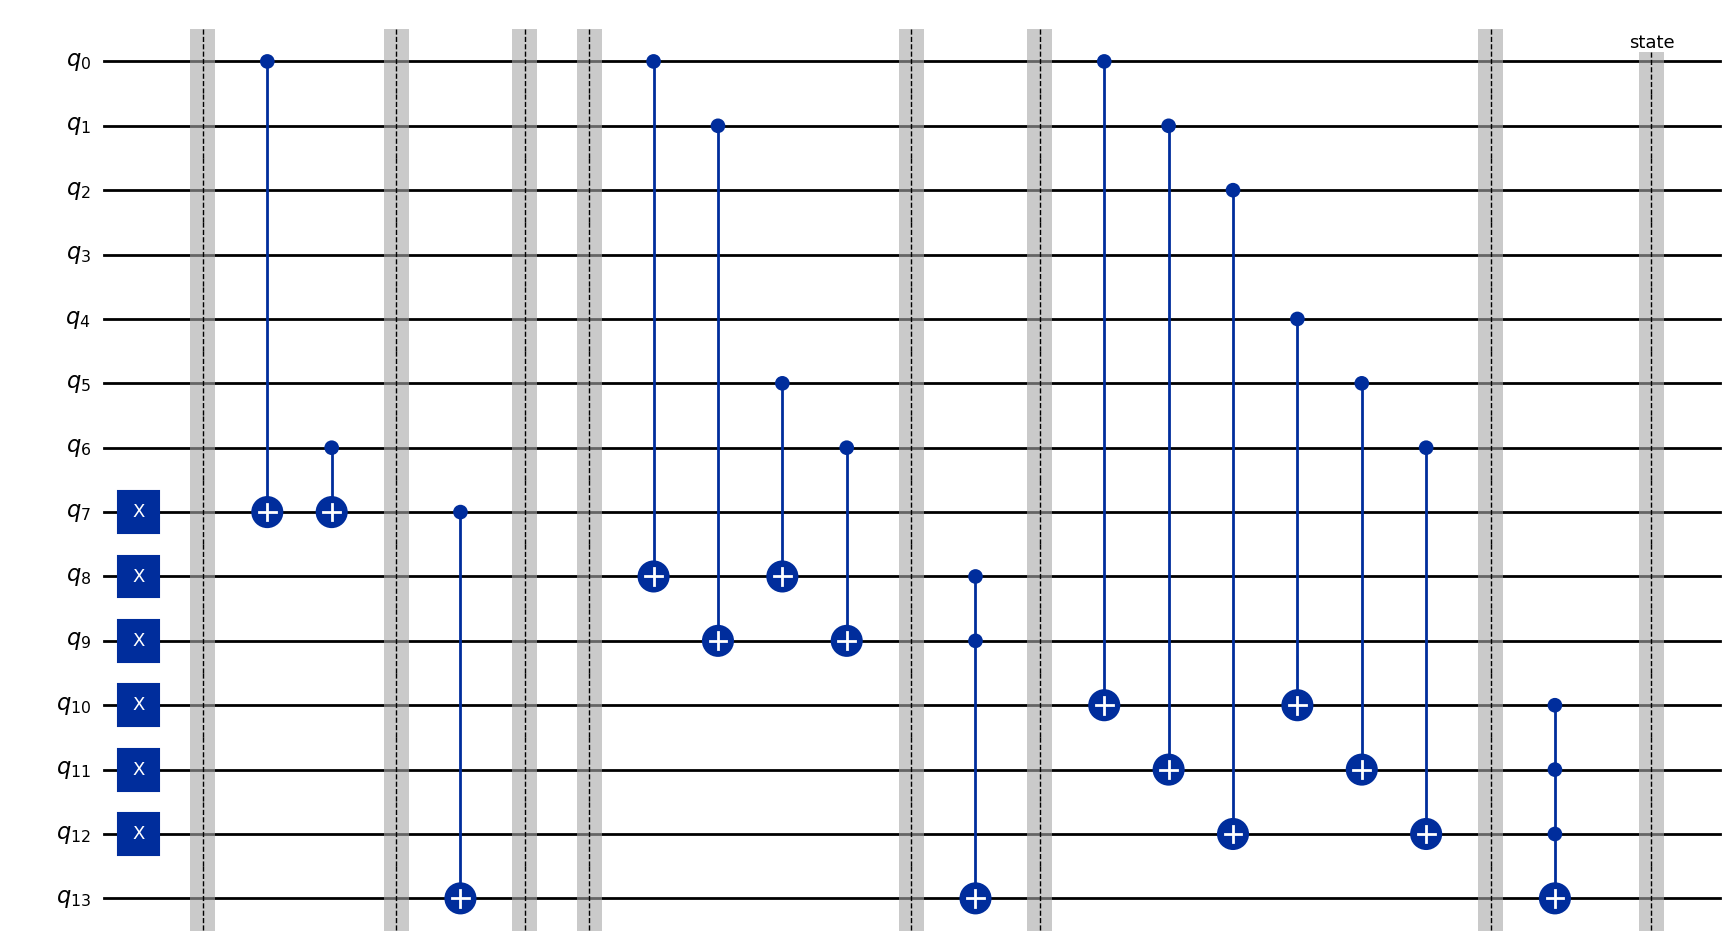

In [340]:

N = 7
period_max= int(np.floor(N/2)) ### 3
period_qubits = sum([i for i in range(0, period_max+1)])
print(period_qubits)
total = N + period_qubits+ 1 
qc = QuantumCircuit(total)
for i in range(N,N +period_qubits):
    qc.x(i)

### 0101


# P = N-1:
qc.barrier()
qc.cx(0,N)
qc.cx(N-1,N)
qc.barrier()
qc.cx(N, total - 1)
qc.barrier()

control_qubits = [i for i in range(N, N+period_qubits)]
    # P= N-2:
qc.barrier()
qc.cx(0,N+1)
qc.cx((N-2),N+1)
qc.cx(1,N+2)
qc.cx(1 + N-2,N+2)
qc.barrier()
qc.mcx([N+1,N+2], total - 1)
    
#qc.mcx(control_qubits,total - 1)
### P = N - 3
qc.barrier()
qc.cx(0,N+3)
qc.cx((N-3),N+3)
qc.cx(1,N+4)
qc.cx(1 + N-3,N+4)
qc.cx(2,N+5)
qc.cx(2+N-3,N+5)
qc.barrier()
qc.mcx([N+3,N+4,N+5], total - 1)


qc.save_statevector(label = 'state')
res = simulator_aer.run(qc, shots=1).result()
statevector = res.data()['state']
display(statevector.draw('latex'))
display(qc.draw('mpl'))

### Exercise 9

Our objective is to test if a string $x$ (length N) is a palindrome or not. To do so we will add N qubits and *copy* -which is possible since we know the states are orthogonal- the inital state, but backwards:


Initally:
$$
|q_0,q_1,q_2\rangle
$$
Then:
$$
|q_0,q_1,q_2,q_3,q_4,q_5\rangle \rightarrow q_0 = q_5, q_1 = q_4, q_2 = q_3
$$

To check if it is a palidrome or not we must check if:
$$
q_0 = q_3 \\
q_1 = q_4 \\
q_2 = q_5
$$

To do so we apply a very similar procedure to what was done in exercise 7. We will initialize the auxiliary qubits in state $|1\rangle$, as has already been seen if two qubits are different they will flip the target qubit and if not it will not change it. Therefore, by addind CNOTs with controls $q_0$, $q_3$ and target $q_6$ and so on we will do just so. Finally we will use a multiple control NOT gate which uses the states of the auxiliary qubits as control and the final $|y\rangle$ as a target. If the bitstring was a palindrome all of the auxiliary qubits will still be in state $|1\rangle$ and $|y\rangle$ will be flipped (to $|1\rangle$), otherwise it will not. 


Remember that because of the little-endian notation $|y\rangle$ will be the first qubit displayed.

<IPython.core.display.Latex object>

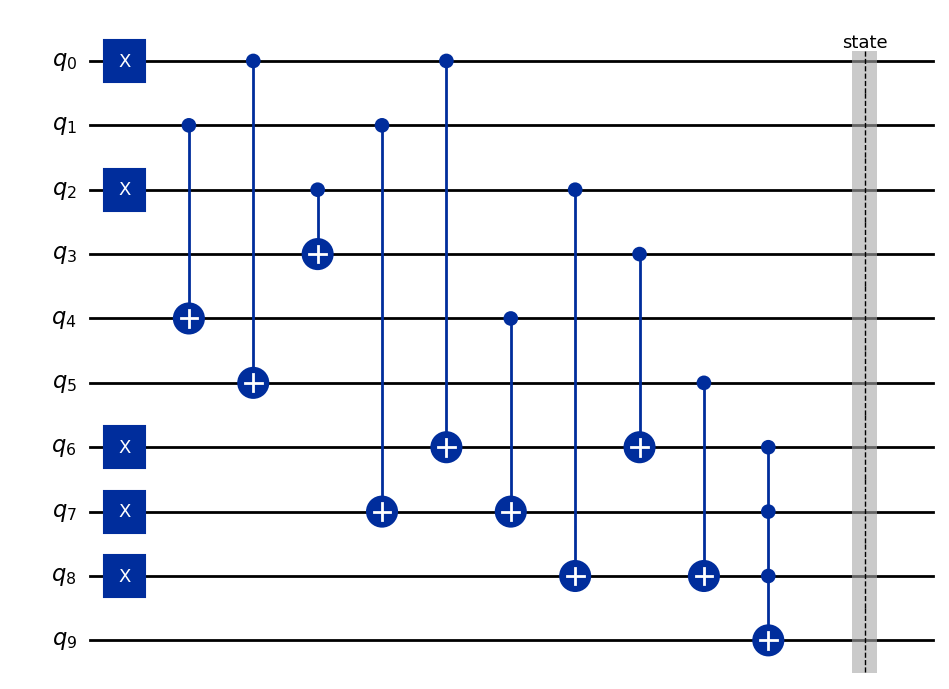

In [21]:
qc = QuantumCircuit(10)
N = 3 ### initial vector length
### Inital 101 (palindrome)
qc.x(0)
qc.x(2)


qc.x(6)
qc.x(7)
qc.x(8)

### Rewrite on the added three qubits but on the other way around

#qc.cx(0,5)
#qc.cx(1,4)
#qc.cx(2,3)

for i in range(3):
    qc.cx(i, (2*3-1)-i)

### Now lets check if q_0 = q_3, q_1 = q_4, q_2 = q_5

#qc.cx(0,6)
#qc.cx(3,6)
#qc.cx(1,7)
#qc.cx(4,7)
#qc.cx(2,8)
#qc.cx(5,8)
for i in range(0,N):
    qc.cx(i, i+2*N)
    qc.cx(i+N, i+2*N)

    
#qc.mcx([6,7,8],9)
control_qubit = [i for i in range(2*N, qc.num_qubits -1)]
qc.mcx(control_qubit, 9)




qc.save_statevector(label = 'state')
res = simulator_aer.run(qc, shots=1).result()
statevector = res.data()['state']
display(statevector.draw('latex'))
display(qc.draw('mpl'))


In [24]:
def ex_9(vec):
    """
    Implements a quantum algorithm to check if an input bitstring (represented by `vec`)
    is a palindrome, using auxiliary qubits and a multi-controlled X gate.

    The algorithm proceeds as follows:
    1.  Determines the number of original qubits `N` from the length of `vec`.
    2.  Initializes an `N`-qubit quantum circuit and sets its state to `vec`.
    3.  Adds `2*N + 1` auxiliary qubits and one classical bit. The total quantum
        qubits in the circuit become `3*N + 1`.
        - The first `N` auxiliary qubits (indices `N` to `2*N-1`) will store a reversed copy of the input.
        - The next `N` auxiliary qubits (indices `2*N` to `3*N-1`) will store the XOR comparison results.
        - The last auxiliary qubit (index `3*N`) will be the final output qubit, indicating palindrome.
    4.  Creates a reversed copy of the initial state on the first `N` auxiliary qubits.
        This is done by applying CNOT gates from original qubit `i` to auxiliary qubit `(2*N-1) - i`.
    5.  Initializes the `N` comparison auxiliary qubits (indices `2*N` to `3*N-1`) to the `|1>` state.
        These qubits will be flipped to `|0>` if the corresponding bits in the original and reversed
        strings are *different*. Thus, they remain `|1>` only if the bits are *equal*.
    6.  Applies CNOT gates to compare original qubits with their reversed counterparts:
        - For each `i` from 0 to `N-1`:
            - `qc.cx(i, i+2*N)`: CNOT from original qubit `i` to comparison qubit `i+2*N`.
            - `qc.cx(i+N, i+2*N)`: CNOT from reversed qubit `i+N` to comparison qubit `i+2*N`.
        After these operations, comparison qubit `i+2*N` will be `|1>` if `q_i == q_{N-1-i}`, and `|0>` otherwise.
    7.  Applies a multi-controlled X gate. The control qubits are the `N` comparison auxiliary qubits
        (indices `2*N` to `3*N-1`). The target is the very last auxiliary qubit (index `3*N`).
        This target qubit will be flipped to `|1>` if and only if *all* comparison qubits are `|1>`,
        which means the original string is a palindrome.
    8.  Measures the final output qubit (index `3*N`) into the classical bit.
    9.  Saves the complete statevector of the `3*N + 1` quantum qubits.
    10. Runs the circuit on `simulator_aer` for 1 shot to retrieve the statevector.
    11. Performs a partial trace to remove all intermediate auxiliary qubits (the `N` reversed copy
        qubits and the `N` comparison qubits). The resulting density matrix represents the state
        of the original `N` qubits and the final output qubit.
    12. Extracts the dominant pure state (eigenvector corresponding to the maximum eigenvalue)
        from the partially traced density matrix.
    13. Returns this dominant state as a Qiskit `Statevector` object.

    Args:
        vec (np.ndarray): The initial statevector for the first `N` qubits.
                          Its length must be a power of 2.

    Returns:
        Statevector: The reduced `Statevector` object representing the dominant component
                     of the quantum state after all operations and partial tracing.
                     This statevector will have `N+1` qubits (original `N` + final output qubit).
                     The state of the final output qubit (the last qubit in the returned Statevector)
                     will indicate if the input `vec` corresponds to a palindrome.

    Raises:
        ValueError: If the length of `vec` is not a power of 2.
        Exception: Propagates exceptions from Qiskit or NumPy if circuit construction,
                   simulation, or linear algebra operations fail.

    """
    
    
    N = int(np.log2(len(vec)))
    if 2**N != len(vec):
        raise ValueError("Length of input vector `vec` must be a power of 2.")

    qc = QuantumCircuit(N) # Circuit for the original N qubits
    qc.initialize(vec, [i for i in range(0, N)]) # intializes with the passed vector

    # N auxiliary qubits and 1 classical bit
    total_added_qubits = N + N + 1
    extra_qubits = QuantumRegister(total_added_qubits) # N aux qubits: aux_0 to aux_N-1
    ### N-1 to determine parity two by two and qubit |y>
    measure_bit = ClassicalRegister(1) # One classical bit for measurement

    qc.add_register(extra_qubits)
    qc.add_register(measure_bit) 
    
    for i in range(0, N): ### Reproducing the state but backwards ex: 100 -> 001
        qc.cx(i,(2*N-1) - i)
    ### Now we do a very similar reasoning to exercise 7, but now we WANT for them to be the same:
    total = qc.num_qubits
    for i in range(2*N, total-1): ### since we would like for aux qubits to activate the last, only if the qubits are equal we need to start them off at |1>
        qc.x(i)
    ### Now apply the CNOTs to check if they are the same:
    for i in range(0, N):
        qc.cx(i, i+2*N)
        qc.cx(i+N, i+2*N)
    ### Finally apply the Multiple Control NOT:
    control_qubits = [q for q in range(2*N, total -1)]
    qc.mcx(control_qubits, total -1)
    
    qc.save_statevector(label = 'state')
    res = simulator_aer.run(qc, shots=1).result()
    statevector = res.data()['state']
    
    # Perform partial trace to remove the intermediate auxiliary qubits
    # The qubits to trace out are the control_qubits for mcx.
    # The result will be a density matrix for the original N qubits plus the target_qubit_for_mcx.
    # Qubit indices for partial_trace are 0-indexed across the *full* system.
   
    traced_out_qubits_indices = [qbits for qbits in range(N, total - 1)]
    
    p_trace = partial_trace(statevector, traced_out_qubits_indices)

    # Get eigenvalues and eigenvectors of the density matrix
    # eigh returns eigenvalues in ascending order
    eigvals, eigvecs = eigh(p_trace.data)

    # Find the index of the maximum eigenvalue (corresponding to the dominant pure state)
    max_idx = eigvals.argmax()

    # Extract the corresponding eigenvector
    reduced_statevector_data = eigvecs[:, max_idx]

    # Convert the NumPy array to a Qiskit Statevector object
    final_statevector_qiskit = Statevector(reduced_statevector_data)
    
    return final_statevector_qiskit


    
    
    

In [25]:

# Helper function to check if a bitstring is a palindrome
def is_palindrome(s: str) -> bool:
    return s == s[::-1]

# Helper function to generate a palindrome bitstring
def generate_palindrome_bitstring(n: int) -> str:
    if n == 0: return ""
    if n == 1: return "0" # Or "1"
    
    half_len = n // 2
    first_half = ''.join(np.random.choice(['0', '1'], half_len))
    
    if n % 2 == 0: # Even length
        return first_half + first_half[::-1]
    else: # Odd length
        middle_char = np.random.choice(['0', '1'])
        return first_half + middle_char + first_half[::-1]

# Helper function to generate a non-palindrome bitstring
def generate_non_palindrome_bitstring(n: int) -> str:
    if n < 2: # Cannot create a non-palindrome with length 0 or 1
        return "" # Or raise an error
    
    # Simple strategy: make the first and last characters different
    # and fill the middle arbitrarily.
    # Or, generate a random string and ensure it's not a palindrome.
    
    s = ''.join(np.random.choice(['0', '1'], n))
    # Ensure it's not a palindrome
    while is_palindrome(s):
        # If it's a palindrome, flip one bit to make it non-palindrome
        # Try flipping the first bit different from the last
        if s[0] == s[-1]:
            if s[0] == '0':
                s = '1' + s[1:-1] + '0'
            else:
                s = '0' + s[1:-1] + '1'
        else: # Already not a palindrome
            break
        # If still a palindrome (e.g., n=2, "00" -> "10" -> "01" -> "11" -> "00"),
        # try flipping a different bit or regenerate entirely.
        # For simplicity, just regenerate a few times.
        if is_palindrome(s):
            s = ''.join(np.random.choice(['0', '1'], n))
    return s


# --- New Test Cases for N from 1 to 7 ---
if __name__ == "__main__":
    print("\n--- New Test Cases: N from 1 to 7 with specific patterns ---")

    N_values = range(1, 8) # N from 1 to 7

    for n in N_values:
        print(f"\n--- Testing for N = {n} Qubits ---")

        # Test Case 1: Alternating bitstring (01010...) - from previous request
        alternating_bitstring = ''.join(['01'[(i % 2)] for i in range(n)])
        
        print(f"  Test Case 1: Initial state from alternating string '{alternating_bitstring}'")
        try:
            # Convert bitstring to initial NumPy array
            input_vec_alt = basis_ket_to_array(alternating_bitstring)
            
            # Time the ex_9 function call (previously ex_7)
            start_time_alt = time.perf_counter()
            returned_state_alt = ex_9(input_vec_alt) # Calling ex_9
            end_time_alt = time.perf_counter()
            time_elapsed_alt = end_time_alt - start_time_alt
            
            print(f"    Returned Statevector has {returned_state_alt.num_qubits} qubits.")
            print(f"    Time taken by ex_9: {time_elapsed_alt:.9f} seconds")
            print(f"    Final Statevector (LaTeX):")
            # This will print the raw LaTeX string. For rendering, you'd need a LaTeX-enabled environment.
            display(returned_state_alt.draw(output='latex'))
        except ValueError as e:
            print(f"    Error in Test Case 1: {e}")
        except Exception as e:
            print(f"    An unexpected error occurred in Test Case 1: {e}")


        # --- New Test Case 2: Palindrome Bitstring ---
        if n >= 1: # Palindromes can be generated for n >= 1
            palindrome_bitstring = generate_palindrome_bitstring(n)
            print(f"\n  Test Case 2: Palindrome string '{palindrome_bitstring}'")
            try:
                input_vec_pal = basis_ket_to_array(palindrome_bitstring)
                start_time_pal = time.perf_counter()
                returned_state_pal = ex_9(input_vec_pal) # Calling ex_9
                end_time_pal = time.perf_counter()
                time_elapsed_pal = end_time_pal - start_time_pal
                
                print(f"    Returned Statevector has {returned_state_pal.num_qubits} qubits.")
                print(f"    Time taken by ex_9: {time_elapsed_pal:.9f} seconds")
                print(f"    Final Statevector (LaTeX):")
                display(returned_state_pal.draw(output='latex'))
            except ValueError as e:
                print(f"    Error in Test Case 2: {e}")
            except Exception as e:
                print(f"    An unexpected error occurred in Test Case 2: {e}")

        # --- New Test Case 3: Non-Palindrome Bitstring ---
        if n >= 2: # Non-palindromes require at least 2 bits
            non_palindrome_bitstring = generate_non_palindrome_bitstring(n)
            print(f"\n  Test Case 3: Non-Palindrome string '{non_palindrome_bitstring}'")
            try:
                input_vec_non_pal = basis_ket_to_array(non_palindrome_bitstring)
                start_time_non_pal = time.perf_counter()
                returned_state_non_pal = ex_9(input_vec_non_pal) # Calling ex_9
                end_time_non_pal = time.perf_counter()
                time_elapsed_non_pal = end_time_non_pal - start_time_non_pal
                
                print(f"    Returned Statevector has {returned_state_non_pal.num_qubits} qubits.")
                print(f"    Time taken by ex_9: {time_elapsed_non_pal:.9f} seconds")
                print(f"    Final Statevector (LaTeX):")
                display(returned_state_non_pal.draw(output='latex'))
            except ValueError as e:
                print(f"    Error in Test Case 3: {e}")
            except Exception as e:
                print(f"    An unexpected error occurred in Test Case 3: {e}")

    print("\n--- End of all Test Cases for basis_ket_to_array and ex_9 ---")



--- New Test Cases: N from 1 to 7 with specific patterns ---

--- Testing for N = 1 Qubits ---
  Test Case 1: Initial state from alternating string '0'
    Returned Statevector has 2 qubits.
    Time taken by ex_9: 0.005000210 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 2: Palindrome string '0'
    Returned Statevector has 2 qubits.
    Time taken by ex_9: 0.007781922 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


--- Testing for N = 2 Qubits ---
  Test Case 1: Initial state from alternating string '01'
    Returned Statevector has 3 qubits.
    Time taken by ex_9: 0.005722836 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 2: Palindrome string '00'
    Returned Statevector has 3 qubits.
    Time taken by ex_9: 0.005548160 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 3: Non-Palindrome string '01'
    Returned Statevector has 3 qubits.
    Time taken by ex_9: 0.006560562 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


--- Testing for N = 3 Qubits ---
  Test Case 1: Initial state from alternating string '010'
    Returned Statevector has 4 qubits.
    Time taken by ex_9: 0.012722883 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 2: Palindrome string '010'
    Returned Statevector has 4 qubits.
    Time taken by ex_9: 0.011107088 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 3: Non-Palindrome string '001'
    Returned Statevector has 4 qubits.
    Time taken by ex_9: 0.005054776 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


--- Testing for N = 4 Qubits ---
  Test Case 1: Initial state from alternating string '0101'
    Returned Statevector has 5 qubits.
    Time taken by ex_9: 0.015860528 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 2: Palindrome string '1111'
    Returned Statevector has 5 qubits.
    Time taken by ex_9: 0.016339406 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 3: Non-Palindrome string '1101'
    Returned Statevector has 5 qubits.
    Time taken by ex_9: 0.012995781 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


--- Testing for N = 5 Qubits ---
  Test Case 1: Initial state from alternating string '01010'
    Returned Statevector has 6 qubits.
    Time taken by ex_9: 0.054953347 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 2: Palindrome string '01010'
    Returned Statevector has 6 qubits.
    Time taken by ex_9: 0.031142985 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 3: Non-Palindrome string '10000'
    Returned Statevector has 6 qubits.
    Time taken by ex_9: 0.039266060 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


--- Testing for N = 6 Qubits ---
  Test Case 1: Initial state from alternating string '010101'
    Returned Statevector has 7 qubits.
    Time taken by ex_9: 0.259653483 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 2: Palindrome string '010010'
    Returned Statevector has 7 qubits.
    Time taken by ex_9: 0.190244894 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 3: Non-Palindrome string '011100'
    Returned Statevector has 7 qubits.
    Time taken by ex_9: 0.176803430 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


--- Testing for N = 7 Qubits ---
  Test Case 1: Initial state from alternating string '0101010'
    Returned Statevector has 8 qubits.
    Time taken by ex_9: 1.794830034 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 2: Palindrome string '1111111'
    Returned Statevector has 8 qubits.
    Time taken by ex_9: 1.801474265 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


  Test Case 3: Non-Palindrome string '1110000'
    Returned Statevector has 8 qubits.
    Time taken by ex_9: 1.783803961 seconds
    Final Statevector (LaTeX):


<IPython.core.display.Latex object>


--- End of all Test Cases for basis_ket_to_array and ex_9 ---


Now you may test for any string you wish:

In [26]:
bits = '1100110'

vector = basis_ket_to_array(bits)
st = ex_9(vector)


display(st.draw('latex'))

<IPython.core.display.Latex object>